## To correctly work and predict the customer churn for connectel, I will have to perform EDA (exploratory data analysis) on the data to extract some insights 

#### Import libraries for EDA

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df= pd.read_csv("Customer-Churn.csv")

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
#Investigate the datatypes for anomalies and data types : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# After running the code , its observed that ther are no missing colums, as such no engineering needs to be done, like replacing missing values with the calculated mean or meadian as the case may be.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


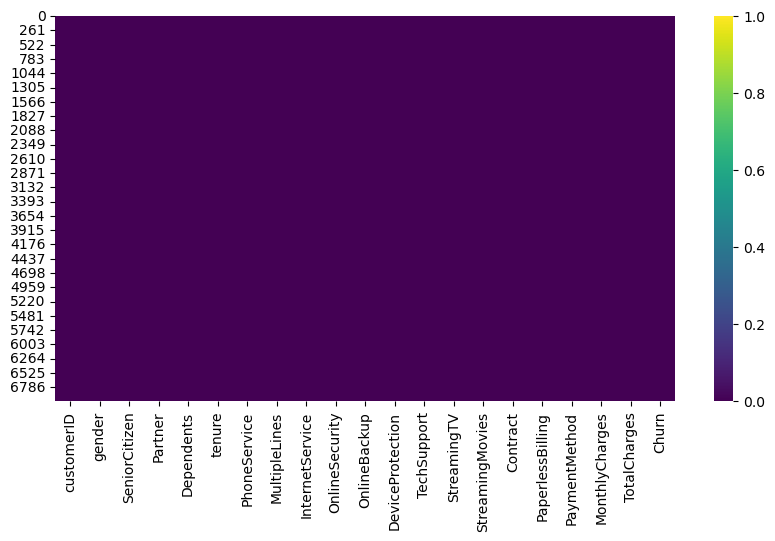

In [9]:
# Visualizing the missing data in a heatmap
plt.figure(figsize  =(10,5))
sns.heatmap(data = df.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.show();

In [10]:
# Numerical statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
# Categorical statistical analysis
df.describe(include=["object", "bool"]).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [12]:
# drop irrelevant columns
df = df.drop(["customerID", "TotalCharges"],axis =1)


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


# EDA
## Numerical Data Analysis


In [14]:
numerical_df= df.select_dtypes(exclude= "object")

In [15]:
numerical_df.head(2)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95


### Univariate Analysis

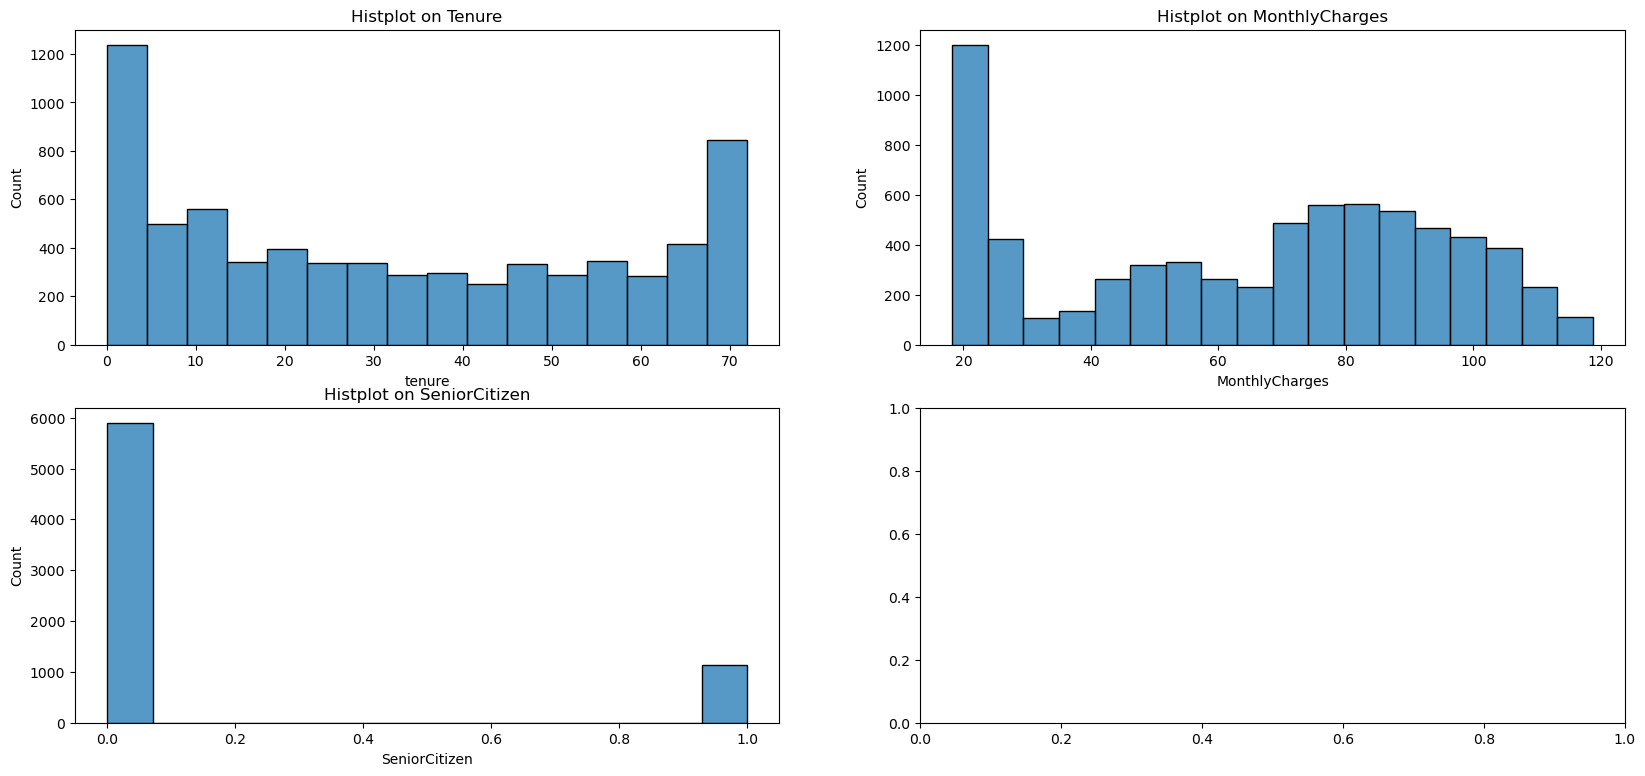

In [132]:
fig, axs= plt.subplots(nrows= 2, ncols= 2, figsize = (20,9))
sns.histplot(data=df["tenure"], ax= axs[0,0])
axs[0,0].set_title("Histplot on Tenure")

sns.histplot(data=df["MonthlyCharges"], ax= axs[0,1])
axs[0,1].set_title("Histplot on MonthlyCharges")

sns.histplot(data=df["SeniorCitizen"], ax = axs [1,0])
axs[1,0].set_title("Histplot on SeniorCitizen")
plt.show()

### Naration
##### Most customers are not senior citizens (about 83.8%); Tenure is quite varied,but mainly skwed to the right, with the majority of customers having between 9 and 55 months of service, Monthly charges vary significantly,but majorly skwed to the left, with most customers paying between 35dollars and 90dollars

## bi-Variet Analysis

In [17]:
numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


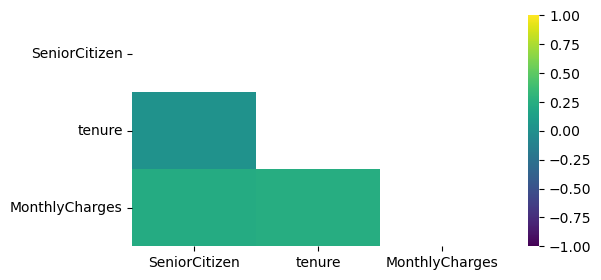

In [120]:
my_mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))
plt.figure(figsize = (6,3))
sns.heatmap(data = numerical_df.corr(), cmap = "viridis", vmin = -1, vmax = 1, fmt = ".2f", annot = True, mask = my_mask );

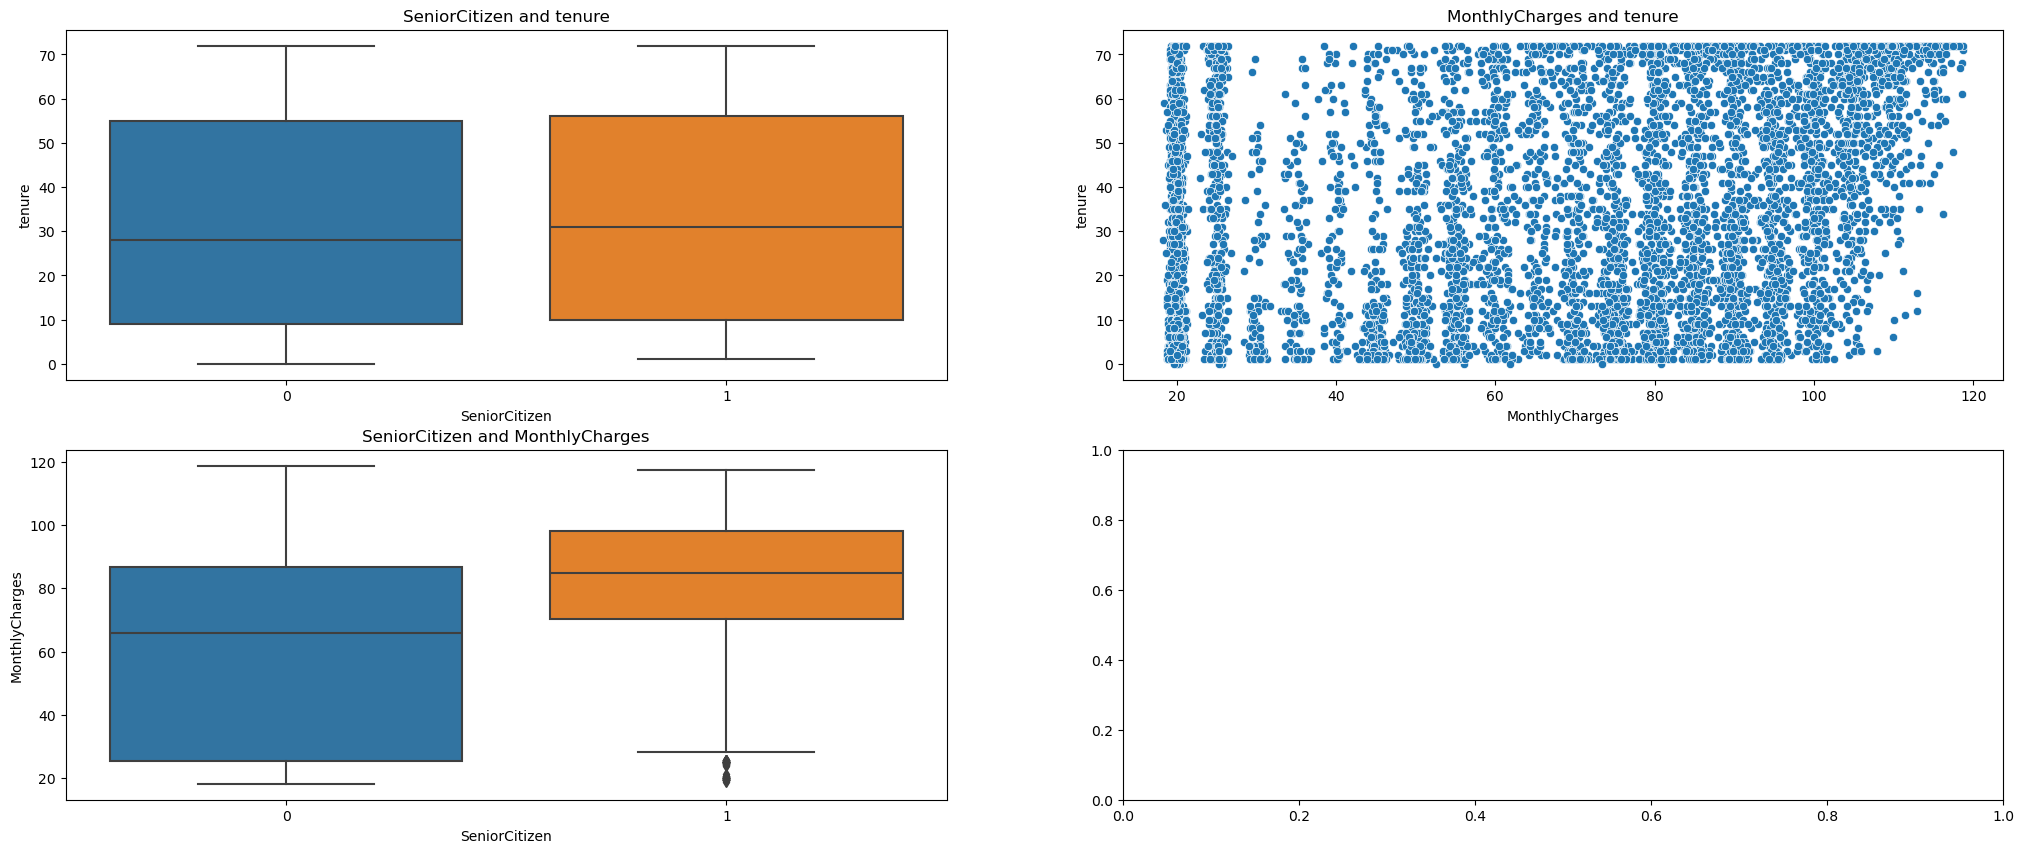

In [19]:
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.boxplot(x="SeniorCitizen", y="tenure", data=df, ax=axs[0,0])
axs[0,0].set_title("SeniorCitizen and tenure")

sns.scatterplot(x="MonthlyCharges", y="tenure", data=df, ax=axs[0,1])
axs[0,1].set_title("MonthlyCharges and tenure")

sns.boxplot(x="SeniorCitizen", y="MonthlyCharges", data=df, ax=axs[1,0])
axs[1,0].set_title("SeniorCitizen and MonthlyCharges");



##### The boxplot[0,0], show almost similar patter, however, those of the non-senior citizens are more condenced , meaning that non-senior citizens tend to have shorter tenure in the company . Plot [1,0]; indicates that senior citizens generally pay more monthly charges compared to non-senior citizens. there is a wide spread amongst the non-senior citizens - thre monthly chaeges vary, with more people paying fees less than 75dollars. Senior citizens tend to pay more monthly charges, with very few out of the lower range of 25dollars


### Categorical data Analysis

#### Univariate Analysis

In [20]:
categorical_df = df.select_dtypes(include = "object")



In [21]:
categorical_df.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


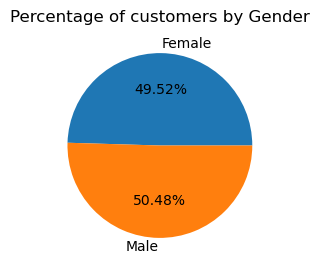

In [22]:
fig,ax=plt.subplots(figsize=(6,3))
count = Counter(df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of customers by Gender")
plt.show();

In [23]:
cat_columns = categorical_df.columns.to_list()
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

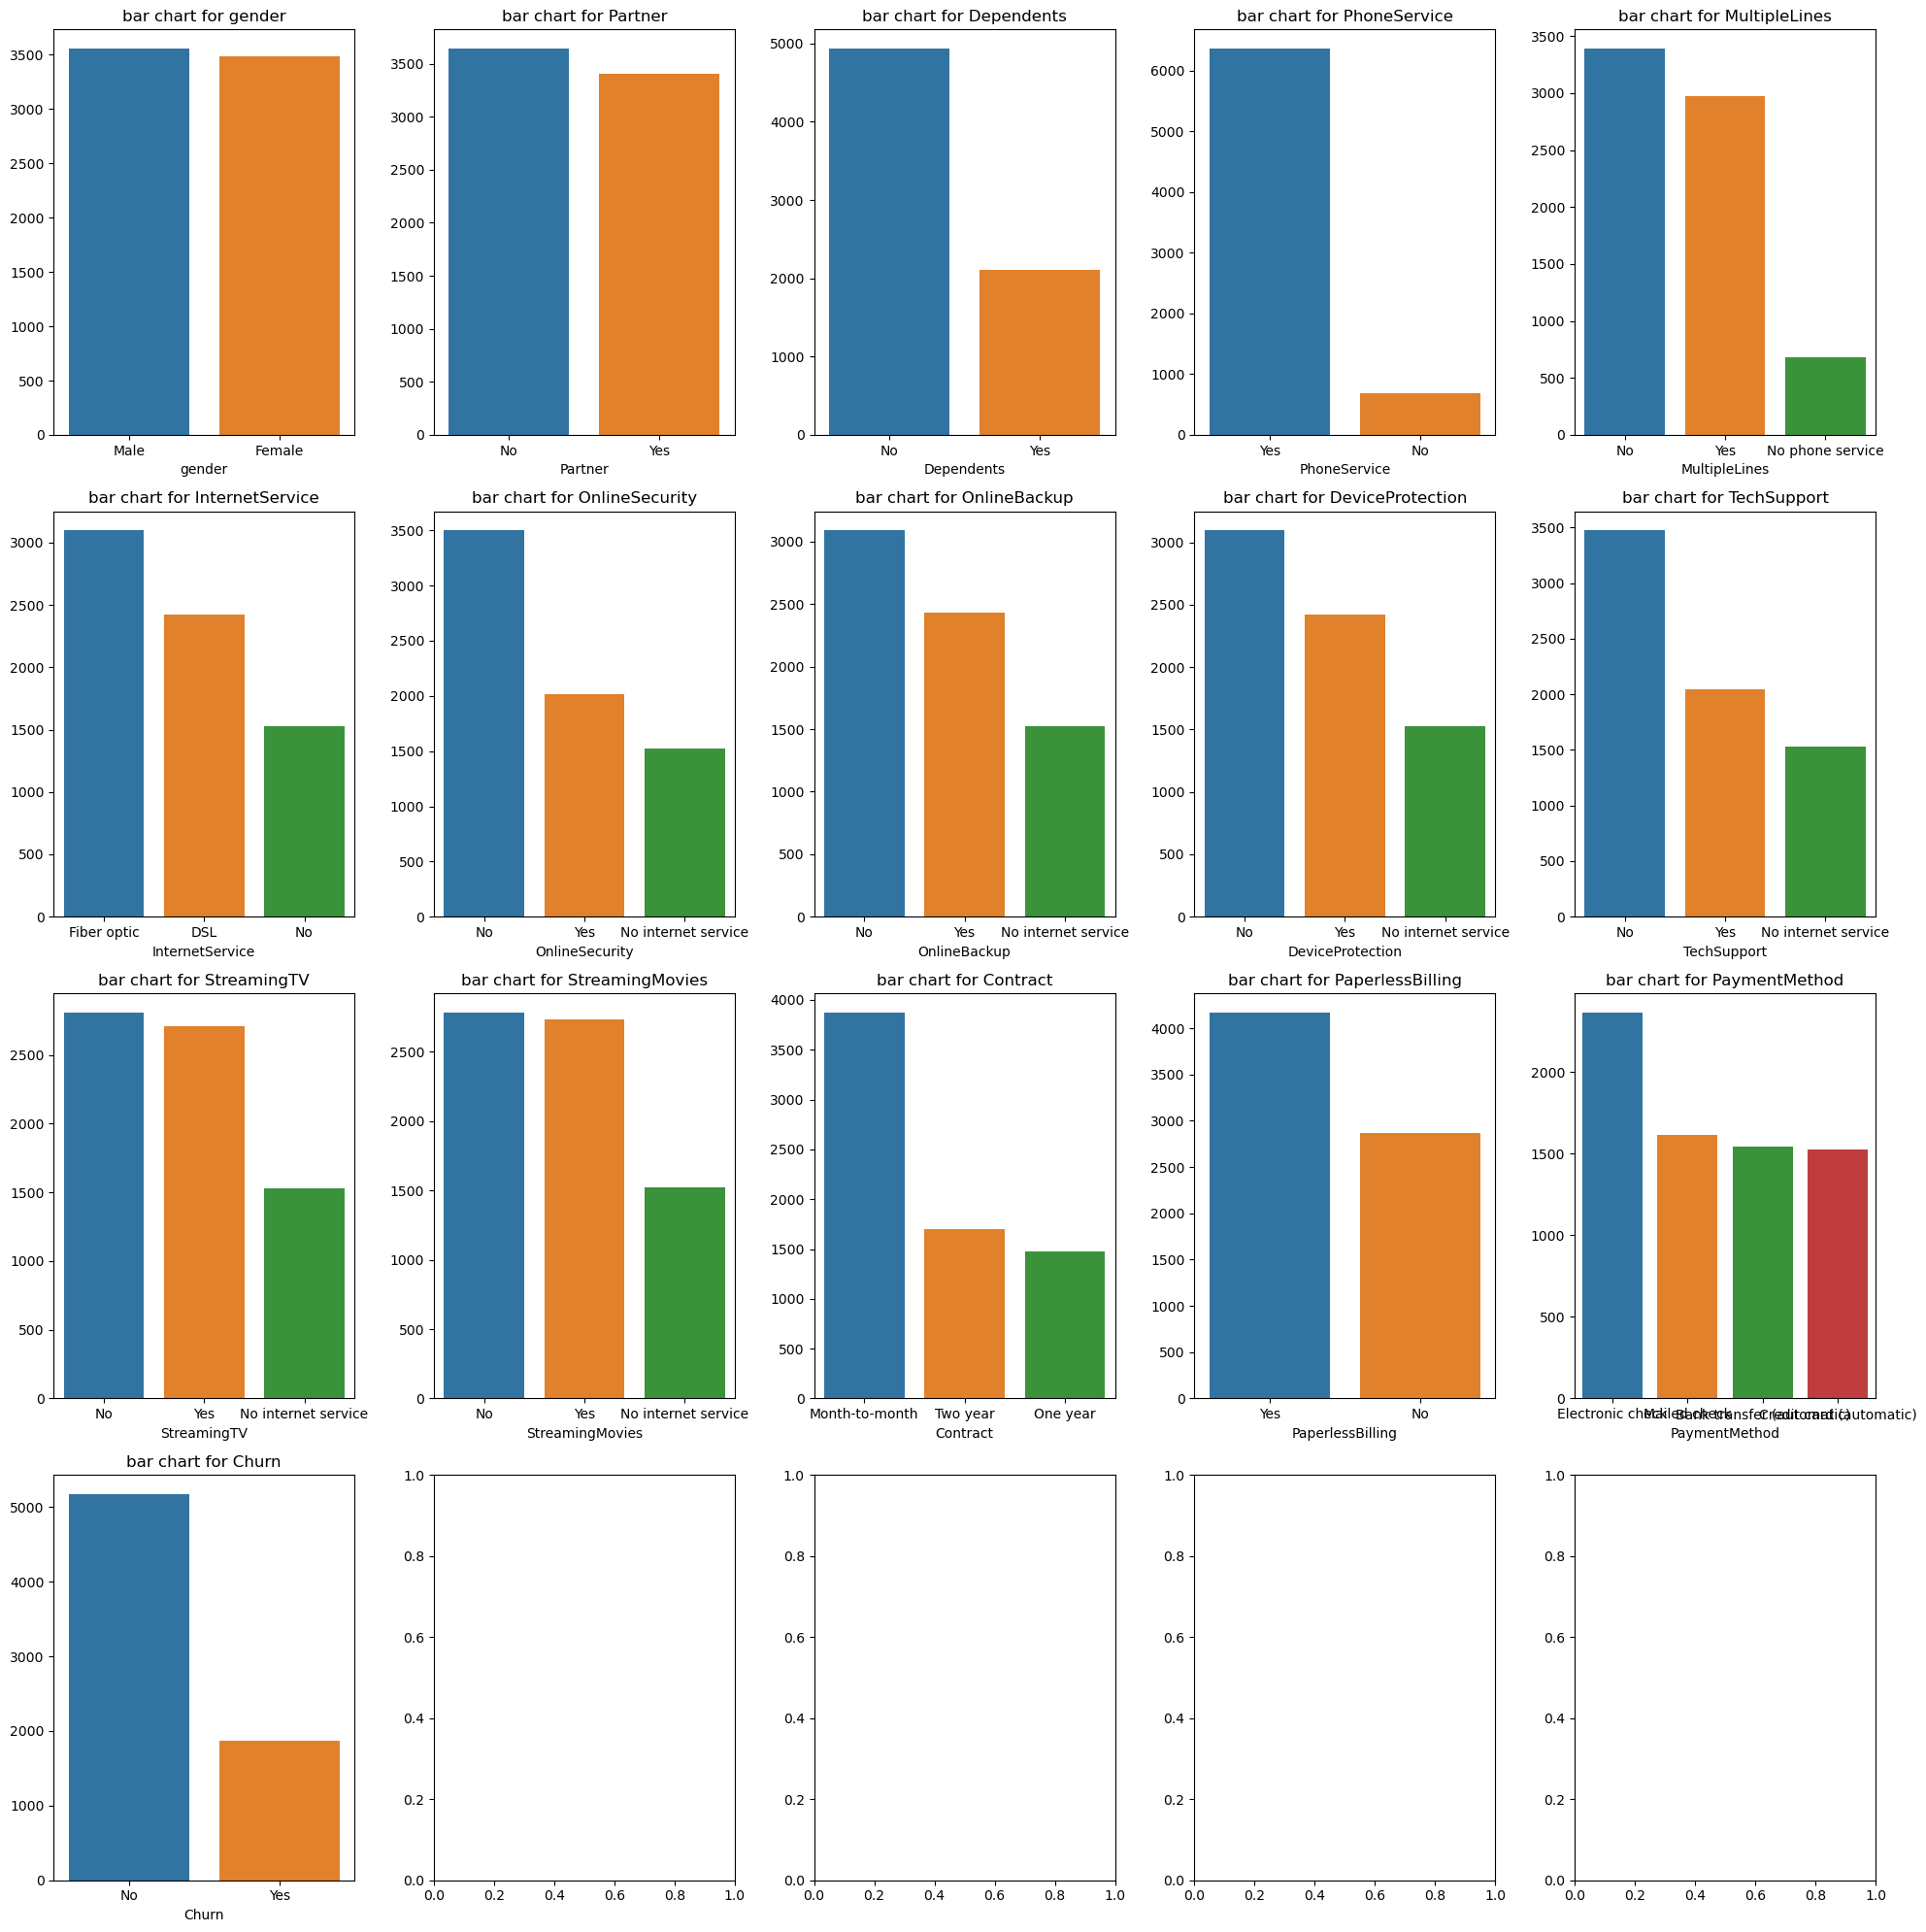

In [24]:
fig, axes = plt.subplots(nrows= 4, ncols= 5, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.barplot(x = df[feature].value_counts().index, y = df[feature].value_counts().values, ax = position[index])
    position[index].set_title(f"bar chart for {feature}")
    
plt.tight_layout()

#### Bi- Variate Analysis

AttributeError: 'numpy.int64' object has no attribute 'startswith'

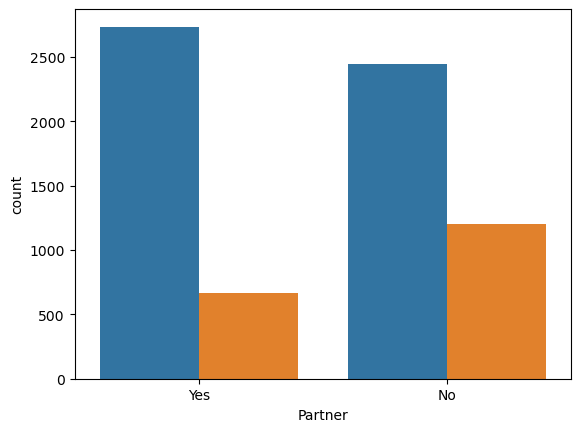

In [133]:
# fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(27,10))
# sns.barplot(x="gender", data= categorical_df, y="tenure", ax=axs[0,2])


sns.countplot(data= categorical_df, x = "Partner", hue = df["Churn"]);

### Narration
##### People with partners are less likely to churn than people without partners.There are more people with partners within connettel . There is no bias between male and female as it relates to churn

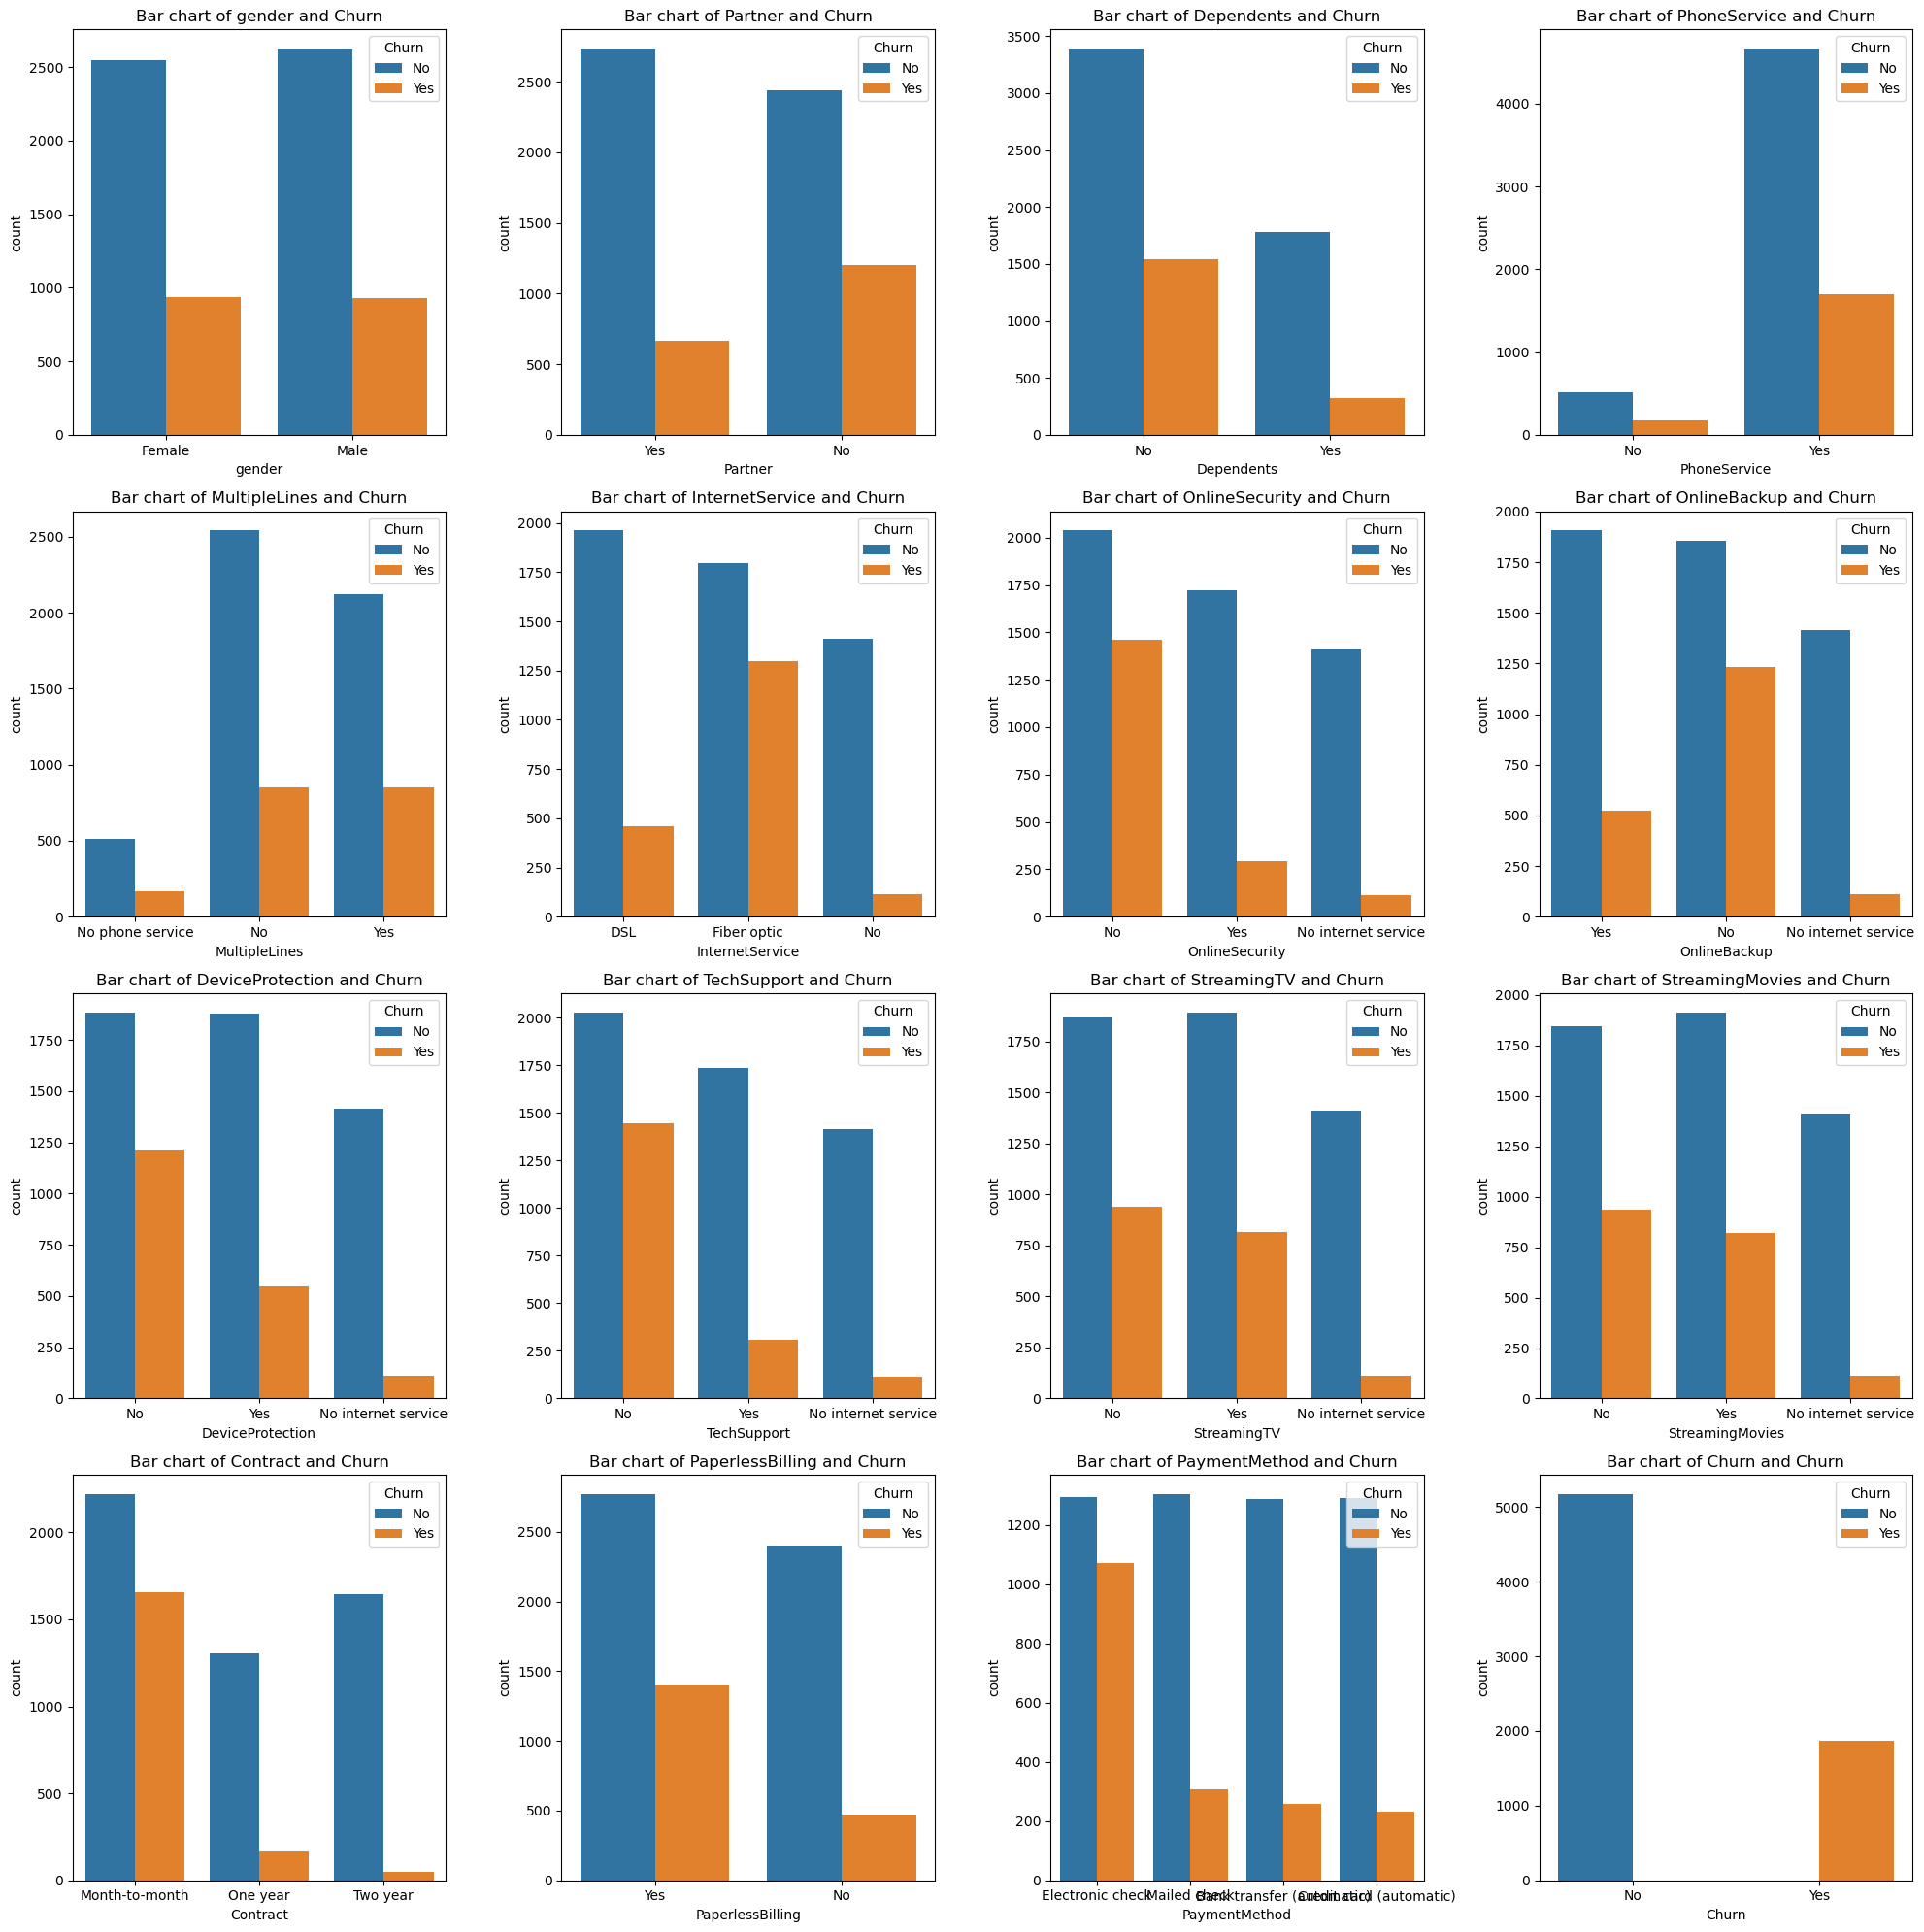

In [26]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.countplot(data = categorical_df, x = feature, hue = df["Churn"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Churn")

plt.tight_layout()

## MULTIVARIATE ANALYSIS


In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [28]:
Bydependent= df.groupby("Dependents")[["MonthlyCharges", "tenure"]].sum().reset_index()
Bydependent

,Dependents,MonthlyCharges,tenure
0,No,330524.85,147033
1,Yes,125591.75,80957


In [29]:
Bydependent_ = pd.melt(Bydependent, id_vars="Dependents", var_name="Metric", value_name="Total")
Bydependent_

,Dependents,Metric,Total
0,No,MonthlyCharges,330524.85
1,Yes,MonthlyCharges,125591.75
2,No,tenure,147033.00
3,Yes,tenure,80957.00


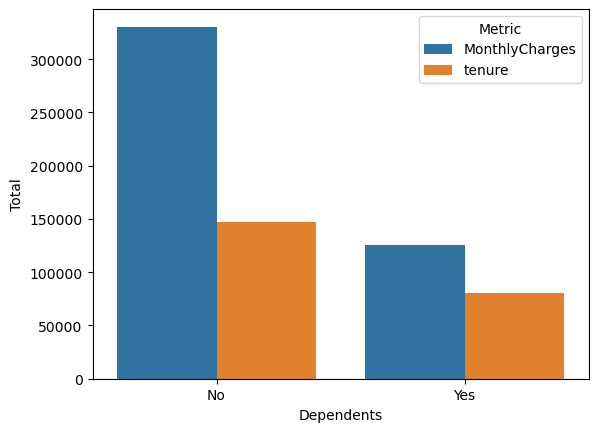

In [30]:
Bydependent_ = pd.melt(Bydependent, id_vars="Dependents", var_name="Metric", value_name="Total")
sns.barplot(data=Bydependent_, x="Dependents", y="Total", hue="Metric");

#### Customers with partners have lesser monthly charges and are more than 50% likely to churn ; whereas customers without dependents have higher monthly charges and are less likely to churn

## MODELLING (CUSTOMER CHURN)

In [31]:
# Encode categorical variables
# Assign a label to the 'churn' feature and Drop the label (this will now be the feature for training the model)
# Split data inti Tran and Test & Scale the data ( Using either min-max Scaler OR Standard Scaler)
# Train the model

In [32]:
# Select categorical columns and Encode
categorical_column = df.select_dtypes(include=['object'])

In [36]:
categorical_column.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [45]:
for features in categorical_column:
    categorical_column[features] = encoder.fit_transform(categorical_column[features])

In [46]:
categorical_column.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
# Drop the label (churn feature)
# labels= df["Churn"]

In [50]:
# add the encoded feature to the main dataframe
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No


In [51]:
for features in categorical_column:
    df[features] = encoder.fit_transform(categorical_column[features])

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [55]:
# Assign a label to the 'churn' feature and Drop the label (this will now be the feature for training the model)
labels= df["Churn"] #Thisis our answers
features= df.drop(["Churn"], axis=1) # This is our questions

In [57]:
labels.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [58]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [59]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0


In [86]:
# Import the neccessary libraries for training the machine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
# !pip install xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Split data into Train and Test & 
# Scale the data ( Using either min-max Scaler OR Standard Scaler)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [63]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training


### ConnectTel aims to develop a robust customer churn prediction system . The company seeks to accurately forecast customer churn and implement targeted retention initiatives ; By this , it means that the company favours CLASS1 (CHURN)

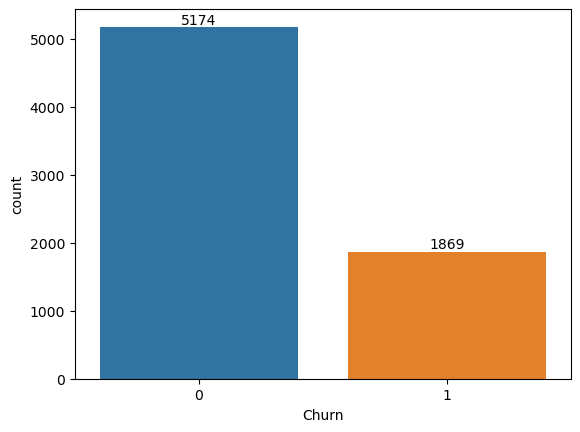

In [66]:
ax=sns.countplot(x=df["Churn"], order=df["Churn"].value_counts(ascending=False).index)
values=df["Churn"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

#### The above means that approximately 26% of the customers will churn , as there is a serious class imbalance. This has to be taken care of in the model, as connectel seems to want to prevent customer churn . What is impoortant to the company is RECALL

#### Trying out logistic regression first

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1036
           1       0.45      0.92      0.60       373

    accuracy                           0.68      1409
   macro avg       0.70      0.76      0.67      1409
weighted avg       0.82      0.68      0.70      1409

Confusion Matrix:
 [[611 425]
 [ 29 344]]




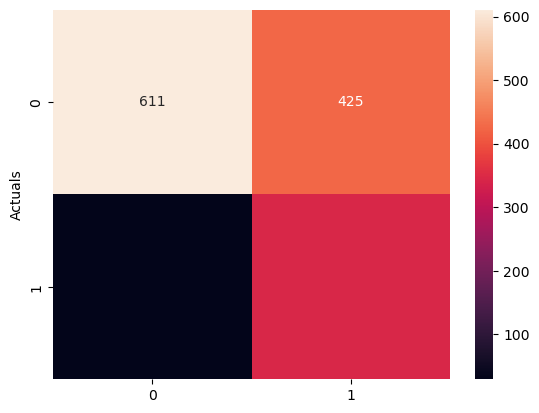

In [76]:
weights= {0:1, 1:5}
model = LogisticRegression(random_state=42, class_weight= weights )  # Initialize the model
model.fit(X_train_scaled, y_train)  # Train the model
predictions = model.predict(X_test_scaled)  # Make predictions on the test set
# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print("\n")
sns.heatmap(matrix, annot=True, fmt='.6g')
plt.xlabel=("Predictions")
plt.ylabel("Actuals");

##### Recall= TP/(TP+FN): from all the positive classes, how many we predicted correctly. Recall should be high as possible.
##### Precision= TP/(TP+FP): from all the classes we have predicted as positive, how many are actually positive. Precision should be high as possible.
##### Accuracy: From all the classes (positive and negative), how many of them we have predicted correctly. Accuracy should be high as possible.


#### Train other classifications(models), using a for loop to automate the process

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1036
           1       0.45      0.92      0.60       373

    accuracy                           0.68      1409
   macro avg       0.70      0.76      0.67      1409
weighted avg       0.82      0.68      0.70      1409

Confusion Matrix:
 [[611 425]
 [ 29 344]]




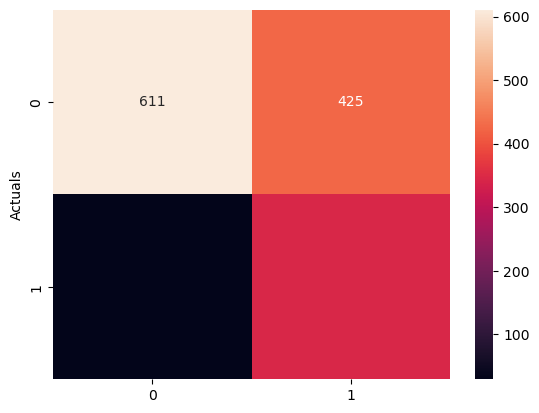

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73      1036
           1       0.45      0.90      0.60       373

    accuracy                           0.68      1409
   macro avg       0.69      0.75      0.67      1409
weighted avg       0.81      0.68      0.70      1409

Confusion Matrix:
 [[623 413]
 [ 39 334]]




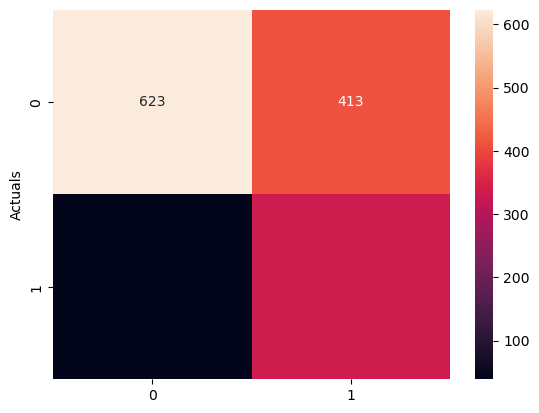

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1036
           1       0.48      0.44      0.46       373

    accuracy                           0.73      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409

Confusion Matrix:
 [[860 176]
 [208 165]]




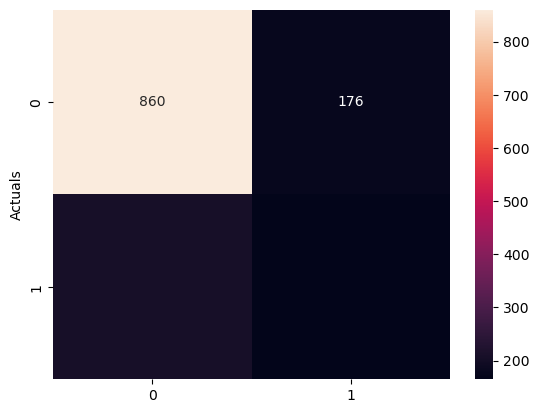

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Confusion Matrix:
 [[945  91]
 [208 165]]




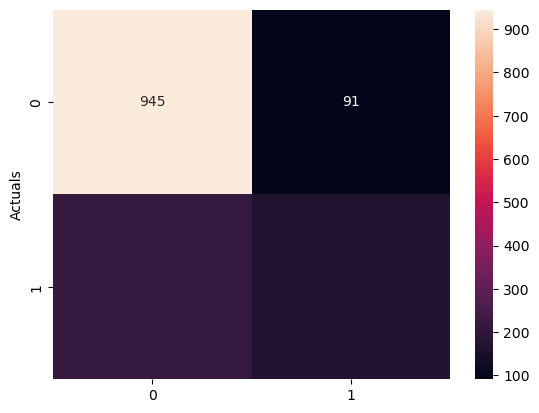

<-- DecisionTree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1036
           1       0.48      0.44      0.46       373

    accuracy                           0.73      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409

Confusion Matrix:
 [[860 176]
 [208 165]]




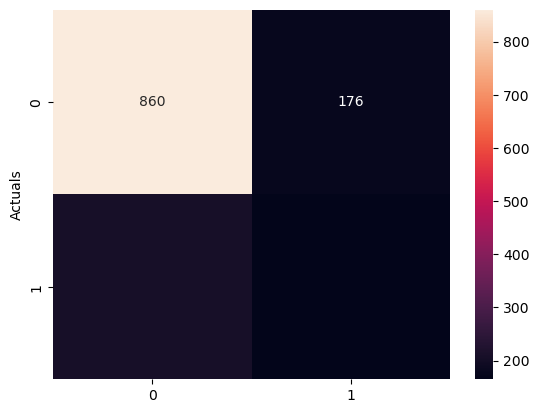

<-- SVC -->
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.57      0.72      1036
           1       0.44      0.92      0.59       373

    accuracy                           0.67      1409
   macro avg       0.70      0.75      0.66      1409
weighted avg       0.82      0.67      0.68      1409

Confusion Matrix:
 [[594 442]
 [ 28 345]]




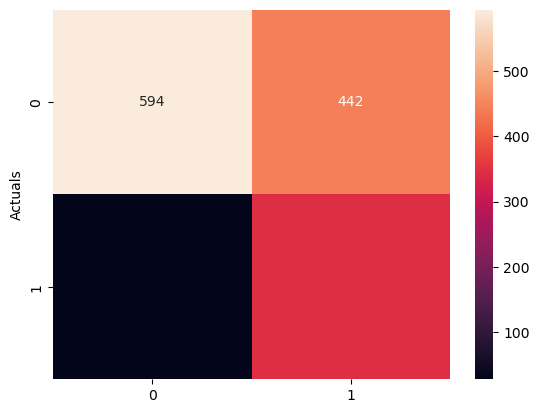

In [85]:
# create a list with different models and automate the model training , using a for loop
# weights : already defined as {0:1, 1:5}
classifiers=     [[LogisticRegression(random_state=42, class_weight=weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=weights), 'Random Forest'],
               [DecisionTreeClassifier(random_state=42, class_weight=weights), 'DecisionTree'],
               [SVC(random_state=42, class_weight=weights), 'SVC']] 

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")
    sns.heatmap(matrix, annot=True, fmt='.6g')
    plt.xlabel=("Predictions")
    plt.ylabel("Actuals")
    plt.show()

##### After training our models, the top 3 performing models are SVC (Prescision= 44%, Recall= 92% and Accuraccy= 67%) , SGD (Prescision= 45%, Recall= 90% and Accuraccy= 68%) and LogisticsRegression (Prescision= 45%, Recall= 92% and Accuraccy= 68%).

#### LogisticsRegression (Prescision= 45%, Recall= 92% and Accuraccy= 68%) came tops with slightly higher ACCURACY score than SVC

## Recommendation will be for connectel to use LogisticRegression machine learning model to predict customer churn

### Apply Hyperparameter tuning for LogisticRegression to so see if it gets better

In [87]:
# Hyperparameter tuning for LogisticRegression

myparam_grids = {
    'dual': [False],  # Dual formulation only works for 'liblinear' solver
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 10, 100],  # Only used when solver='liblinear'
    'l1_ratio': [None, 0.1, 0.5, 0.9],  # Only used when penalty='elasticnet'
    'max_iter': [100, 200, 500],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs'],# Different solvers for optimization
    'class_weight': [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:5}]
}

grid_search = GridSearchCV(estimator=classifiers[0][0], param_grid=myparam_grids, cv=5, scoring="recall")
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

# classifiers[0][0]

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.90


In [88]:
grid_search.best_estimator_

LogisticRegression(class_weight={0: 1, 1: 5}, random_state=42,
                   solver='liblinear')

### LogisticRegression Model ###
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1036
           1       0.45      0.92      0.60       373

    accuracy                           0.68      1409
   macro avg       0.70      0.76      0.67      1409
weighted avg       0.82      0.68      0.70      1409

Confusion Matrix:
 [[611 425]
 [ 29 344]]




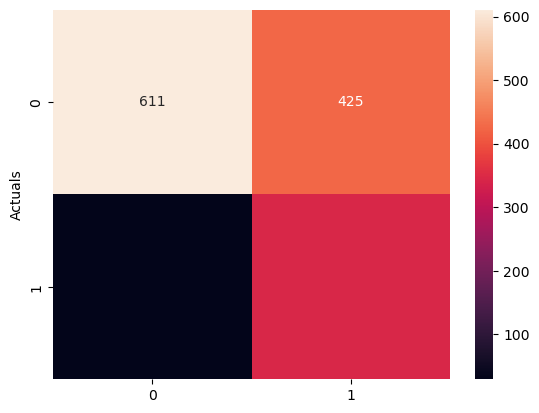

In [89]:
# Evaluate the best model Estimator
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("### LogisticRegression Model ###")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print("\n")
sns.heatmap(matrix, annot=True, fmt='.6g')
plt.xlabel=("Predictions")
plt.ylabel("Actuals");
plt.show()


## After hypertunning slightly reduced the nominal value of FN and increased the TP , but still retained Recall value @ 92%

In [101]:
# feature importance
classifiers[2][0]

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, random_state=42)

In [107]:
importance= classifiers[2][0].feature_importances_
importance

array([0.03001813, 0.0138707 , 0.02015167, 0.01847296, 0.17339733,
       0.00380681, 0.02148805, 0.01289117, 0.03329688, 0.01272431,
       0.01481412, 0.01633934, 0.01257322, 0.01726241, 0.2460101 ,
       0.02819592, 0.05524781, 0.26943907])

In [106]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [111]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df

,Feature,Importance
0,gender,0.030018
1,SeniorCitizen,0.013871
2,Partner,0.020152
3,Dependents,0.018473
4,tenure,0.173397
5,PhoneService,0.003807
6,MultipleLines,0.021488
7,InternetService,0.012891
8,OnlineSecurity,0.033297
9,OnlineBackup,0.012724


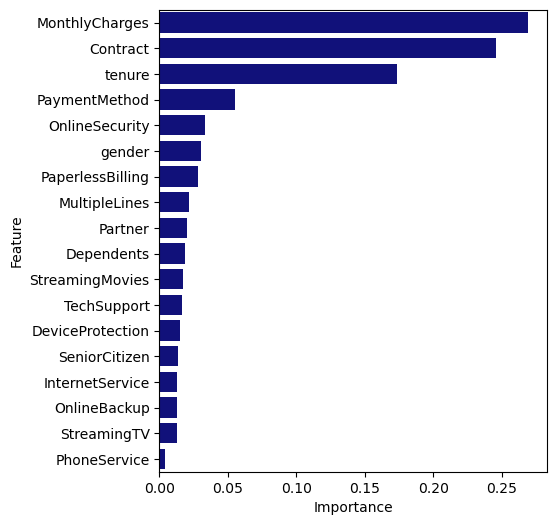

In [131]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

plt.figure(figsize=(5, 6))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='darkblue');

## The important feature in determining if a customer will churn according to decisionTree are  MonthlyCharges, Contract, tenure, PaymentMethod and OnlineSecurity